In [11]:
# Make sure that you have all these libaries available to run the code successfully
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [12]:
import quandl
quandl.ApiConfig.api_key = "KxKMd8dsHx1sWnaGj6_U"

In [13]:
pd.set_option('display.max_columns', None)
df = quandl.get_table('SHARADAR/SF1',dimension='ARY', calendardate={'gte':'2008-12-31', 'lte':'2018-12-31'}, paginate=True).fillna(value=0)

In [26]:
def get_factor_data(start_date,end_date):
    
    df = quandl.get_table('SHARADAR/SF1',dimension='ARY',calendardate={'gte':start_date, 'lte':end_date}, paginate=True).fillna(value=0)
    df = df.sort_values(by=['calendardate','ticker'])
    
    return df

In [27]:
factor_data_5years = get_factor_data('2013-12-31','2019-01-01')

In [30]:
factor_data_10years = get_factor_data('2008-12-31','2019-01-01')

In [28]:
factor_data_5years.tail()

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,assetsnc,assetturnover,bvps,capex,cashneq,cashnequsd,cor,consolinc,currentratio,de,debt,debtc,debtnc,debtusd,deferredrev,depamor,deposits,divyield,dps,ebit,ebitda,ebitdamargin,ebitdausd,ebitusd,ebt,eps,epsdil,epsusd,equity,equityavg,equityusd,ev,evebit,evebitda,fcf,fcfps,fxusd,gp,grossmargin,intangibles,intexp,invcap,invcapavg,inventory,investments,investmentsc,investmentsnc,liabilities,liabilitiesc,liabilitiesnc,marketcap,ncf,ncfbus,ncfcommon,ncfdebt,ncfdiv,ncff,ncfi,ncfinv,ncfo,ncfx,netinc,netinccmn,netinccmnusd,netincdis,netincnci,netmargin,opex,opinc,payables,payoutratio,pb,pe,pe1,ppnenet,prefdivis,price,ps,ps1,receivables,retearn,revenue,revenueusd,rnd,roa,roe,roic,ros,sbcomp,sgna,sharefactor,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
115,ZIMCF,ARY,2018-12-31,2018-07-24,2018-03-31,2018-09-13,-378425.0,8.382250e+05,8.884940e+05,6.967820e+05,1.414430e+05,0.566,0.092,-11917.0,4.185070e+05,4.185070e+05,1.577400e+04,-4.290200e+04,7.889,0.118,0.000000e+00,0.0,0.000000e+00,0.000000e+00,60224.0,11341.0,0.0,0.000,0.000,-4.290200e+04,-3.156100e+04,-0.063,-3.156100e+04,-4.290200e+04,-4.290200e+04,-0.005,-0.005,-0.005,7.499020e+05,7.740730e+05,7.499020e+05,-2.964620e+05,7.0,9.393,-3.006400e+04,-0.004,1.0,4.874680e+05,0.969,0.000000e+00,0.0,3.313960e+05,3.590680e+05,0.000000e+00,117109.0,0.0,117109.0,8.832200e+04,8.832200e+04,0.000000e+00,1.220450e+05,-1169.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,3.384100e+04,45758.0,-1.814700e+04,-16863.0,-4.290200e+04,-4.290200e+04,-4.290200e+04,0.0,0.0,-0.085,5.917190e+05,-1.042510e+05,9057.0,0.000,0.163,-2.845,-3.000,2.433400e+04,0.0,0.015,0.243,0.242,3.846300e+04,-2.132562e+07,5.032420e+05,5.032420e+05,49031.0,-0.048,-0.055,-0.119,-0.085,342.0,5.426880e+05,1.0,8136348.0,8126222.0,8126222.0,0.062,8.382250e+05,214217.0,0.0,0.0,0.103,6.084600e+05
96,ZIVO,ARY,2018-12-31,2019-02-12,2018-12-31,2019-02-12,0.0,4.115060e+05,1.054201e+06,4.115060e+05,0.000000e+00,0.000,-0.131,0.0,3.888910e+05,3.888910e+05,0.000000e+00,-1.463537e+07,0.018,-1.018,1.815462e+07,18154620.0,0.000000e+00,1.815462e+07,0.0,0.0,0.0,0.000,0.000,-7.441447e+06,-7.441447e+06,0.000,-7.441447e+06,-7.441447e+06,-1.463537e+07,-0.090,-0.090,-0.090,-2.228212e+07,-2.056277e+07,-2.228212e+07,3.576937e+07,-5.0,-4.807,-5.006586e+06,-0.032,1.0,0.000000e+00,0.000,0.000000e+00,7193920.0,-4.516388e+06,8.457100e+05,0.000000e+00,0.0,0.0,0.0,2.269362e+07,2.269362e+07,0.000000e+00,1.800364e+07,71756.0,0.000000e+00,3433813.0,1.644529e+06,0.0,5078342.0,0.000000e+00,0.0,-5.006586e+06,0.0,-1.463537e+07,-1.463537e+07,-1.463537e+07,0.0,0.0,0.000,6.130643e+06,-6.130643e+06,854855.0,0.000,-0.808,-1.230,-1.111,0.000000e+00,0.0,0.100,0.000,0.000,0.000000e+00,-7.844778e+07,0.000000e+00,0.000000e+00,2814991.0,-13.883,0.712,-8.799,0.000,0.0,3.315652e+06,1.0,180036436.0,156678765.0,156678765.0,0.000,4.115060e+05,0.0,0.0,0.0,0.002,-2.228212e+07
87,ZKIN,ARY,2018-12-31,2019-01-31,2018-09-30,2019-01-31,-127456.0,7.639856e+07,6.878582e+07,6.434717e+07,1.205139e+07,0.798,2.722,-467138.0,7.682589e+06,7.682589e+06,3.659379e+07,7.103057e+06,1.644,1.056,1.927053e+07,19270530.0,0.000000e+00,1.927053e+07,0.0,407741.0,0.0,0.000,0.000,9.655494e+06,1.006324e+07,0.183,1.006324e+07,9.655494e+06,8.416324e+06,0.520,0.520,0.520,3.704184e+07,2.912938e+07,3.704184e+07,3.836336e+07,4.0,3.812,-2.702133e+06,-0.199,1.0,1.829059e+07,0.333,9.382210e+05,1239170.0,4.791731e+07,3.917436e+07,1.779219e+07,1265181.0,1265181.0,0.0,3.913097e+07,3.913097e+07,0.000000e+00,2.677542e+07,-3595886.0,0.000000e+00,-380000.0,4.192705e+06,0.0,-986029.0,-7.102750e+05,0.0,-2.234995e+06,335413.0,7.018114e+06,7.018114e+06,7.018114e+06,0.0,84943.0,0.128,8.672953e+06,9.617636e+06,5364896.0,0.000,0.723,3.815,3.115,6.280412e+06,0.0,1.620,0.488,0.402,3.760722e

In [29]:
factor_data_5years.var()

accoci            2.349337e+21
assets            1.103279e+26
assetsavg         9.813339e+25
assetsc           7.435991e+23
assetsnc          9.508278e+24
assetturnover     3.185700e+01
bvps              1.355319e+14
capex             1.754219e+23
cashneq           1.423787e+24
cashnequsd        1.990037e+20
cor               1.550101e+24
consolinc         1.460991e+23
currentratio      6.330474e+03
de                1.461267e+09
debt              8.609831e+24
debtc             8.998747e+22
debtnc            1.109832e+24
debtusd           3.028989e+21
deferredrev       4.025176e+21
depamor           2.713372e+22
deposits          3.861386e+25
divyield          2.810062e-01
dps               4.934509e+04
ebit              2.539919e+23
ebitda            3.601210e+23
ebitdamargin      1.458583e+05
ebitdausd         1.001589e+19
ebitusd           5.451104e+18
ebt               2.095260e+23
eps               1.152955e+15
                      ...     
pb                9.603149e+11
pe      

In [32]:
factor_data_10years.corr()

,accoci,assets,assetsavg,assetsc,assetsnc,assetturnover,bvps,capex,cashneq,cashnequsd,cor,consolinc,currentratio,de,debt,debtc,debtnc,debtusd,deferredrev,depamor,deposits,divyield,dps,ebit,ebitda,ebitdamargin,ebitdausd,ebitusd,ebt,eps,epsdil,epsusd,equity,equityavg,equityusd,ev,evebit,evebitda,fcf,fcfps,fxusd,gp,grossmargin,intangibles,intexp,invcap,invcapavg,inventory,investments,investmentsc,investmentsnc,liabilities,liabilitiesc,liabilitiesnc,marketcap,ncf,ncfbus,ncfcommon,ncfdebt,ncfdiv,ncff,ncfi,ncfinv,ncfo,ncfx,netinc,netinccmn,netinccmnusd,netincdis,netincnci,netmargin,opex,opinc,payables,payoutratio,pb,pe,pe1,ppnenet,prefdivis,price,ps,ps1,receivables,retearn,revenue,revenueusd,rnd,roa,roe,roic,ros,sbcomp,sgna,sharefactor,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
accoci,1.000000,0.403265,0.380186,-0.012189,0.007964,-0.002589,2.039236e-05,-5.161324e-02,0.552542,0.291767,-0.003736,0.082993,-0.000188,-0.000038,0.347646,-5.527944e-04,0.012386,0.065019,0.017985,0.033386,0.429168,-0.000046,-0.000031,8.245168e-02,0.078994,0.000029,0.014642,0.039257,0.086301,0.000028,0.000027,0.000026,0.163148,0.143776,0.048652,0.003488,0.000487,0.000163,0.018719,0.000014,0.108522,7.818034e-02,0.002529,0.243918,0.022035,0.387236,0.368048,0.000766,0.390681,-0.004047,-0.052782,0.420796,-0.015451,-0.004005,0.006639,0.245847,-0.035317,-0.002490,0.059394,-0.053180,0.106829,-0.086307,-0.062994,0.037948,0.150842,0.090929,0.090875,0.048808,-0.030104,0.022067,0.000029,0.082599,0.059327,0.204548,-0.002468,-0.000045,-0.000012,-0.004870,0.034392,0.029765,-0.000038,-0.000028,-0.000024,0.287627,0.081144,0.039855,-0.040508,-0.148549,0.000034,-0.000046,-2.114527e-05,0.000029,0.046516,0.109400,-0.000748,0.027860,0.028119,0.052765,-0.000039,4.026695e-01,0.029658,0.073039,0.062824,6.032216e-05,0.004062
assets,0.403265,1.000000,0.961360,0.343640,0.377682,-0.006024,-4.059399e-05,-3.619518e-01,0.753793,0.312451,0.336270,0.383654,-0.001111,-0.000521,0.859684,3.284444e-01,0.353026,0.123764,0.210056,0.358751,0.919695,0.000114,-0.000285,4.129981e-01,0.450299,0.000314,0.094875,0.086734,0.397026,0.000295,0.000292,0.000286,0.669691,0.645835,0.164806,0.076801,0.000720,0.000087,0.147284,0.000176,0.405801,4.007088e-01,0.004564,0.526443,0.336385,0.990062,0.952564,0.260587,0.930764,0.283577,0.252339,0.986521,0.360600,0.355071,0.059867,0.320270,-0.112457,0.001855,0.288051,-0.312082,0.104546,-0.318044,-0.134701,0.278515,0.106817,0.391492,0.391264,0.072428,0.037112,0.211423,0.000317,0.453191,0.266912,0.514221,0.000747,-0.000534,0.000228,0.001469,0.398377,0.127642,-0.000433,-0.000343,-0.000310,0.533362,0.519683,0.424512,0.059825,0.039586,0.000414,-0.000546,-1.090013e-04,0.000314,0.241928,0.564365,0.005395,0.098803,0.099602,0.062686,-0.000427,9.998901e-01,0.372756,0.393587,0.411995,-2.730545e-06,0.118495
assetsavg,0.380186,0.961360,1.000000,0.351960,0.387291,-0.005774,-3.785533e-05,-3.664043e-01,0.740746,0.323381,0.345616,0.376030,-0.001082,-0.000510,0.804500,3.384623e-01,0.362913,0.126160,0.213780,0.363380,0.878030,0.000096,-0.000279,4.083917e-01,0.447738,0.000308,0.096231,0.087145,0.390339,0.000288,0.000286,0.000279,0.657900,0.667201,0.167571,0.077336,0.000708,0.000030,0.148447,0.000172,0.391466,3.921060e-01,0.004347,0.471895,0.347114,0.944166,0.991194,0.268735,0.881912,0.291988,0.257921,0.945963,0.369410,0.364956,0.061164,0.317691,-0.112886,0.001352,0.284512,-0.309209,0.109495,-0.323755,-0.137921,0.281439,-0.006532,0.384336,0.384099,0.072530,0.027939,0.204648,0.000311,0.434979,0.271748,0.530613,0.000058,-0.000523,0.000220,0.000212,0.405619,0.133163,-0.000424,-0.000335,-0.000303,0.550966,0.511603,0.425663,0.061598,0.041424,0.000405,-0.000534,-1.048784e-04,0.000308,0.247818,0.541094,0.002184,0.099788,0.099714,0.056480,-0.000418,9.618506e-01,0.369041,0.388163,0.411479,-1.186492e-05,0.121117
assetsc,-0.012189,0.343640,0.351960,1.000000,0.845834,-0.000648,1.555809e-04,-8.381223e-01,0.265562,0.017766,0.891071,0.737894,-0.000729,-

In [33]:
get_factor_data('2018-11-30','2019-01-01').corr()

,accoci,assets,assetsavg,assetsc,assetsnc,assetturnover,bvps,capex,cashneq,cashnequsd,cor,consolinc,currentratio,de,debt,debtc,debtnc,debtusd,deferredrev,depamor,deposits,divyield,dps,ebit,ebitda,ebitdamargin,ebitdausd,ebitusd,ebt,eps,epsdil,epsusd,equity,equityavg,equityusd,ev,evebit,evebitda,fcf,fcfps,fxusd,gp,grossmargin,intangibles,intexp,invcap,invcapavg,inventory,investments,investmentsc,investmentsnc,liabilities,liabilitiesc,liabilitiesnc,marketcap,ncf,ncfbus,ncfcommon,ncfdebt,ncfdiv,ncff,ncfi,ncfinv,ncfo,ncfx,netinc,netinccmn,netinccmnusd,netincdis,netincnci,netmargin,opex,opinc,payables,payoutratio,pb,pe,pe1,ppnenet,prefdivis,price,ps,ps1,receivables,retearn,revenue,revenueusd,rnd,roa,roe,roic,ros,sbcomp,sgna,sharefactor,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
accoci,1.000000,0.845009,0.843365,0.081821,0.050394,-0.033134,0.173864,-0.281747,0.813418,0.793105,0.078192,0.468096,-0.019251,-0.000408,0.816057,0.115460,0.115454,0.152955,-0.008538,0.264206,0.842442,0.000998,-0.009398,0.510451,0.433848,0.003121,0.126399,0.130100,0.518957,0.108035,0.108448,-0.001365,0.642730,0.644270,0.345110,-0.027735,-0.004218,-9.914610e-04,-0.083149,-0.013457,0.350060,0.539737,0.059570,0.463906,-0.001724,0.850944,0.847548,0.082395,0.846882,0.015814,-0.028669,0.845387,0.070712,-0.010088,0.035412,0.667373,0.078770,-0.407374,-0.164251,-0.487707,0.915967,-0.025999,0.170472,-0.015944,-0.687538,0.479374,0.479375,0.126239,0.002397,0.254384,0.002786,0.445548,0.573787,0.863274,0.004315,-0.001385,-0.000318,0.001093,0.250846,-0.001607,-0.014306,-0.002425,-0.002556,0.762908,0.325382,0.209397,0.069793,-0.001480,0.002440,0.000876,-0.000090,0.002806,-0.011330,0.499262,-0.050557,0.523183,0.512342,0.421055,-0.011168,0.845696,0.270407,0.639804,0.167352,0.160304,0.149578
assets,0.845009,1.000000,0.999956,0.133384,0.133645,-0.048322,0.428375,-0.358727,0.988670,0.965285,0.134265,0.604344,-0.033286,-0.000635,0.970219,0.129226,0.128425,0.190962,-0.005664,0.367322,0.986266,0.001497,-0.011828,0.637379,0.554478,0.005114,0.169474,0.170434,0.643832,0.177203,0.177309,0.001189,0.787816,0.788044,0.425819,-0.024116,-0.005234,-4.497813e-04,0.385812,0.455840,0.521497,0.757629,0.080124,0.699835,0.040136,0.997483,0.997424,0.130982,0.996222,0.123476,0.118618,0.998831,0.133546,0.128139,0.054254,0.852921,-0.359566,-0.396561,-0.143056,-0.594201,0.831547,-0.265653,0.073505,0.429770,-0.806593,0.599490,0.599491,0.165338,0.001458,0.379401,0.004593,0.771633,0.493102,0.851094,-0.002491,-0.002227,-0.000991,-0.002321,0.316492,0.006688,-0.017081,-0.004043,-0.004275,0.712643,0.430468,0.313193,0.114168,0.043879,0.004158,0.000153,-0.000072,0.004612,0.036398,0.714183,0.229992,0.503153,0.494315,0.381480,-0.010389,0.999992,0.561612,0.774028,0.328911,0.615867,0.046743
assetsavg,0.843365,0.999956,1.000000,0.132348,0.132497,-0.048257,0.429724,-0.358121,0.989108,0.965679,0.133305,0.604190,-0.033231,-0.000632,0.970738,0.128402,0.127616,0.191051,-0.005703,0.366799,0.986077,0.001474,-0.011862,0.637003,0.554046,0.005102,0.169262,0.170244,0.643583,0.176397,0.176509,0.001137,0.787772,0.788028,0.425700,-0.024239,-0.005215,-4.417865e-04,0.388398,0.458596,0.520915,0.757625,0.080046,0.701245,0.038781,0.997471,0.997601,0.130003,0.996211,0.122140,0.117207,0.998886,0.132461,0.126812,0.054019,0.856606,-0.362243,-0.397817,-0.139922,-0.593778,0.830349,-0.260880,0.075361,0.432008,-0.809571,0.599276,0.599277,0.165211,0.001613,0.377928,0.004583,0.772505,0.491229,0.849809,-0.002480,-0.002222,-0.001002,-0.002329,0.315302,0.006694,-0.017170,-0.004035,-0.004269,0.710567,0.430796,0.312437,0.113832,0.043838,0.004147,0.000151,-0.000073,0.004601,0.036903,0.713622,0.232941,0.500170,0.491304,0.383007,-0.010370,0.999940,0.561551,0.773654,0.327307,0.618854,0.046889
assetsc,0.081821,0.133384,0.132348,1.000000,0.991668,-0.010758,0.632315,-0.889482,0.042380,0.042060,0.991435,0.854732,-0.015620,-0.001530,0.246149,0.978197,0.976461,0.044585,0.012683,0.954985,-0.000516,0.007280,

In [14]:
df.tail()

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,assetsnc,assetturnover,bvps,capex,cashneq,cashnequsd,cor,consolinc,currentratio,de,debt,debtc,debtnc,debtusd,deferredrev,depamor,deposits,divyield,dps,ebit,ebitda,ebitdamargin,ebitdausd,ebitusd,ebt,eps,epsdil,epsusd,equity,equityavg,equityusd,ev,evebit,evebitda,fcf,fcfps,fxusd,gp,grossmargin,intangibles,intexp,invcap,invcapavg,inventory,investments,investmentsc,investmentsnc,liabilities,liabilitiesc,liabilitiesnc,marketcap,ncf,ncfbus,ncfcommon,ncfdebt,ncfdiv,ncff,ncfi,ncfinv,ncfo,ncfx,netinc,netinccmn,netinccmnusd,netincdis,netincnci,netmargin,opex,opinc,payables,payoutratio,pb,pe,pe1,ppnenet,prefdivis,price,ps,ps1,receivables,retearn,revenue,revenueusd,rnd,roa,roe,roic,ros,sbcomp,sgna,sharefactor,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6852,AAL,ARY,2017-12-31,2018-02-21,2017-12-31,2018-10-25,-5154000000,51396000000,5.244000e+10,9.146000e+09,4.225000e+10,0.805,8.298,-5.024000e+09,613000000,613000000,17636000000,1919000000,0.611,12.091,25065000000,2.554000e+09,2.251100e+10,25065000000,0,2.017000e+09,0,0.008,0.400,4137000000,6.154000e+09,0.146,6.154000e+09,4137000000,3084000000,3.92,3.90,3.92,3.926000e+09,3.761500e+09,3.926000e+09,4.942426e+10,12.0,8.031,-280000000.0,-0.592,1.0,24571000000,0.582,6294000000,1053000000,54590000000,5.469950e+10,1359000000,4771000000,4.771000e+09,0.000000e+00,4.747000e+10,1.496400e+10,3.250600e+10,2.497226e+10,-27000000.0,0.0,-1.615000e+09,726000000.0,-198000000.0,-1.145000e+09,-3.626000e+09,1.398000e+09,4.744000e+09,0.0,1919000000,1919000000,1919000000,0,0,0.045,20513000000,4058000000,1688000000,0.102,6.361,13.013,13.464,34156000000,0,52.78,0.592,0.592,1752000000,3.361000e+09,42207000000,42207000000,0,0.037,0.510,0.076,0.098,90000000.0,13293000000,1.0,473138683.0,473138683.0,0.0,89.206,45102000000,427000000,1165000000,0,95.325,-5.818000e+09
6853,AAC,ARY,2017-12-31,2018-02-23,2017-12-31,2018-11-07,0,428275000,4.122785e+08,1.119360e+08,3.163390e+08,0.770,6.461,-3.304100e+07,13818000,13818000,0,-25087000,1.848,1.935,225714000,4.722000e+06,2.209920e+08,225714000,0,2.150400e+07,0,0.000,0.000,-8786000,1.271800e+07,0.040,1.271800e+07,-8786000,-25597000,-0.88,-0.88,-0.88,1.509940e+08,1.636705e+08,1.509940e+08,4.386849e+08,-50.0,34.493,-13749000.0,-0.591,1.0,317641000,1.000,143225000,16811000,436377000,4.265702e+08,0,0,0.000000e+00,0.000000e+00,2.921070e+08,6.056900e+07,2.315380e+08,2.267889e+08,9854000.0,-1000000.0,0.000000e+00,24683000.0,0.0,2.460300e+07,-3.404100e+07,0.000000e+00,1.929200e+07,0.0,-20579000,-20579000,-20579000,0,-4508000,-0.065,298353000,19288000,4579000,0.000,1.502,-11.020,-10.784,152548000,0,9.49,0.714,0.695,94096000,-1.460000e+06,317641000,317641000,0,-0.050,-0.126,-0.021,-0.028,7513000.0,158705000,1.0,23897669.0,23277444.0,23277444.0,13.646,285050000,8010000,-5018000,0,12.197,5.136700e+07
6854,AA,ARY,2017-12-31,2018-02-26,2017-12-31,2018-11-02,-5182000000,17447000000,1.717650e+10,4.238000e+09,1.320900e+10,0.678,24.294,-4.050000e+08,1358000000,1358000000,9072000000,559000000,1.303,2.354,1404000000,1.600000e+07,1.388000e+09,1404000000,0,7.520000e+08,0,0.000,0.000,921000000,1.673000e+09,0.144,1.673000e+09,921000000,817000000,1.18,1.16,1.18,4.523000e+09,5.553750e+09,4.523000e+09,8.736678e+09,9.0,5.222,819000000.0,4.399,1.0,2580000000,0.221,0,104000000,14241000000,1.472875e+10,1453000000,1410000000,0.000000e+00,1.410000e+09,1.064900e+10,3.252000e+09,7.397000e+09,8.690678e+09,505000000.0,245000000.0,4.300000e+07,-32000000.0,0.0,-5.060000e+08,-2.260000e+08,-6.600000e+07,1.224000e+09,13000000.0,217000000,217000000,217000000,0,342000000,0.019,1317000000,1263000000,1898000000,0.000,1.921,40.049,39.559,9138000000,0,46.68,0.746,0.746,1043000000,1.130000e+08,11652000000,11652000000,32000000,0.013,0.039,0.063,0.079,24000000.0,2840000

In [15]:
df.sort_values('calendardate').tail()

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,assetsnc,assetturnover,bvps,capex,cashneq,cashnequsd,cor,consolinc,currentratio,de,debt,debtc,debtnc,debtusd,deferredrev,depamor,deposits,divyield,dps,ebit,ebitda,ebitdamargin,ebitdausd,ebitusd,ebt,eps,epsdil,epsusd,equity,equityavg,equityusd,ev,evebit,evebitda,fcf,fcfps,fxusd,gp,grossmargin,intangibles,intexp,invcap,invcapavg,inventory,investments,investmentsc,investmentsnc,liabilities,liabilitiesc,liabilitiesnc,marketcap,ncf,ncfbus,ncfcommon,ncfdebt,ncfdiv,ncff,ncfi,ncfinv,ncfo,ncfx,netinc,netinccmn,netinccmnusd,netincdis,netincnci,netmargin,opex,opinc,payables,payoutratio,pb,pe,pe1,ppnenet,prefdivis,price,ps,ps1,receivables,retearn,revenue,revenueusd,rnd,roa,roe,roic,ros,sbcomp,sgna,sharefactor,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4889,EBF,ARY,2018-12-31,2018-05-11,2018-02-28,2019-01-04,-16428000,329439000,3.275632e+08,1.633440e+08,1.660950e+08,1.130,10.301,-2603000.0,96230000,96230000,253257000,32905000,5.524,0.259,30000000,0.0,3.000000e+07,30000000,0,14091000.0,0,0.044,0.800,47833000,6.192400e+07,0.167,6.192400e+07,47833000,47056000,1.30,1.30,1.30,2.617040e+08,2.573442e+08,2.617040e+08,3.976789e+08,8.0,6.422,4.268700e+07,1.681,1.0,116914000,0.316,119857000,777000,113781000,1.183910e+08,26480000,0,0.0,0.000000e+00,6.773500e+07,2.957100e+07,3.816400e+07,4.639089e+08,15764000.0,-1350000.0,-3.313000e+06,0.0,-22260000.0,-2.557300e+07,-3953000.0,0.0,4.529000e+07,0.0,32905000,32905000,32905000,-147000,0,0.089,69613000,47301000,12168000,0.615,1.773,14.098,14.000,45908000,0,18.20,1.253,1.248,35654000,1.641770e+08,370171000,370171000,0,0.100,0.128,0.404,0.129,1337000.0,69451000,1.0,25489502.0,25391998.0,25417244.0,14.578,209582000,3600000,14151000,6324000,8.249,133773000.0
1584,ROK,ARY,2018-12-31,2018-11-09,2018-09-30,2019-01-31,-941900000,6262000000,6.442975e+09,2.830700e+09,3.431300e+09,1.035,13.247,-125000000.0,618800000,618800000,3793800000,535500000,1.265,2.871,1776200000,551000000.0,1.225200e+09,1776200000,249900000,164600000.0,0,0.026,3.645,1403800000,1.568400e+09,0.235,1.568400e+09,1403800000,1330800000,4.27,4.21,4.27,1.617500e+09,1.791275e+09,1.617500e+09,2.158559e+10,15.0,13.763,1.175000e+09,9.370,1.0,2872200000,0.431,1290700000,73000000,3891800000,3.613925e+09,581600000,1578900000,290900000.0,1.288000e+09,4.644500e+09,2.236900e+09,2.407600e+09,2.042819e+10,-792100000.0,-9900000.0,-1.400500e+09,-49400000.0,-440800000.0,-1.888900e+09,-170400000.0,-35500000.0,1.300000e+09,-32800000.0,535500000,535500000,535500000,0,0,0.080,1599000000,1273200000,713400000,1.049,12.629,38.148,39.642,576800000,0,169.27,3.065,3.184,1190100000,6.198100e+09,6666000000,6666000000,0,0.083,0.299,0.388,0.211,38500000.0,1599000000,1.0,120684079.0,125400000.0,126900000.0,53.158,4971300000,179600000,795300000,0,40.715,593800000.0
1590,ROAD,ARY,2018-12-31,2018-12-14,2018-09-30,2019-02-14,0,496310000,4.124300e+08,2.674550e+08,2.288550e+08,1.649,5.817,-37873000.0,99137000,99137000,580560000,50791000,1.988,0.657,62888000,14773000.0,4.811500e+07,62888000,38738000,25321000.0,0,0.000,0.000,62586000,8.790700e+07,0.129,8.790700e+07,62586000,61316000,1.11,1.11,1.11,2.994690e+08,2.258250e+08,2.994690e+08,3.925489e+08,6.0,4.466,2.824800e+07,0.619,1.0,99536000,0.146,36654000,1270000,288866000,2.496545e+08,24556000,1659000,0.0,1.659000e+06,1.968410e+08,1.345410e+08,6.230000e+07,4.287979e+08,71590000.0,-51719000.0,9.801400e+07,4556000.0,0.0,9.506100e+07,-89592000.0,0.0,6.612100e+07,0.0,50791000,50791000,50791000,0,0,0.075,38209000,61327000,63510000,0.000,1.432,8.442,7.514,178692000,0,8.34,0.630,0.559,129625000,7.252500e+07,680096000,680096000,0,0.123,0.225,0.251,0.092,975000.0,55303000,1.0,51414619.0,45605845.0,45919648.0,14.912,459656000,1580000,10525000,8890000,8.929,132914000.0
1524,RXN,ARY,2018-1

In [ ]:
# 10 years of data 

df_factor_data = quandl.get_table('SHARADAR/SF1',dimension='ARY', calendardate={'gte':'2008-12-31', 'lte':'2018-12-31'}, paginate=True).fillna(value=0)

In [16]:
df = df.sort_values('date')
df.columns = ['Date','Open','High','Low','Close']
df.head()

KeyError: 'date'

In [33]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

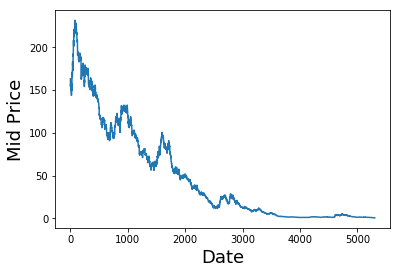

In [35]:
import matplotlib.pyplot as plt
plt.plot((df['Low']+df['High'])/2.0)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)

plt.show()

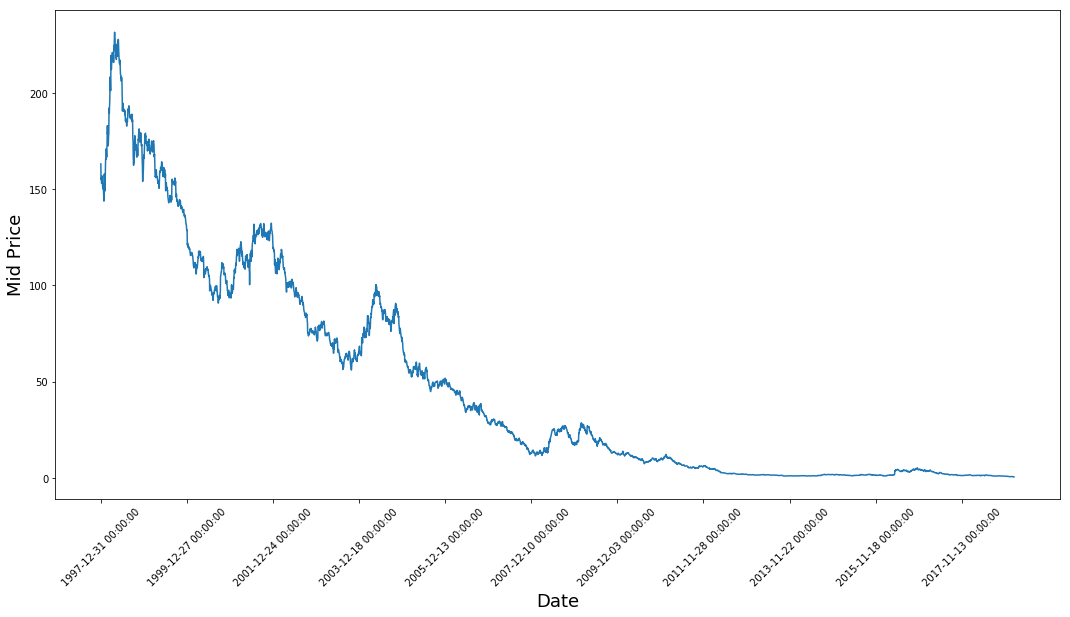

In [34]:

plt.figure(figsize = (18,9))
plt.plot((df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [36]:
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

/usr/bin/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/bin/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [37]:
train_data = mid_prices[:11000]
test_data = mid_prices[11000:]

In [46]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [47]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [48]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)


In [49]:
#creating train and test sets
dataset = new_data.values

In [50]:
train = dataset[0:987,:]
valid = dataset[987:,:]


In [51]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)


/usr/bin/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [52]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [53]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [54]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [55]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/1
100s - loss: 0.0029


In [56]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [57]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)


In [58]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [59]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

10.183764128313657

/usr/bin/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


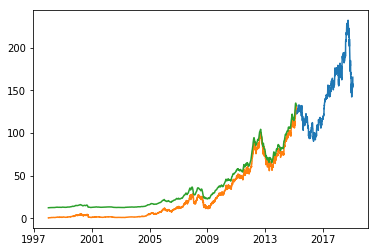

In [60]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])